In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [31]:
DATA_URL = "https://raw.githubusercontent.com/enpure/kaggle---Regression-with-a-Crab-Age-Dataset/main/"
df = pd.read_csv(DATA_URL + "train.csv", index_col='id')
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


# Eda

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [4]:
df.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [18]:
df['Sex'].value_counts()

Sex
M    27084
I    23957
F    23010
Name: count, dtype: int64

In [32]:
X = df.copy()

In [33]:
# Преобразуем категориальный признак через get_dummy
X = pd.get_dummies(X, columns=['Sex'])      

# преобразуем из булевого в числовой формат, хотя это не обязательно, можно обучать и с булевыми признаками
X['Sex_F'] = X['Sex_F'].astype(int)
X['Sex_I'] = X['Sex_I'].astype(int)
X['Sex_M'] = X['Sex_M'].astype(int)

In [34]:
X

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0,1,0
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0,1,0
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0,0,1
3,3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,0,0
4,4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74046,74046,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10,1,0,0
74047,74047,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6,0,1,0
74048,74048,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10,1,0,0
74049,74049,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8,0,1,0


<Axes: >

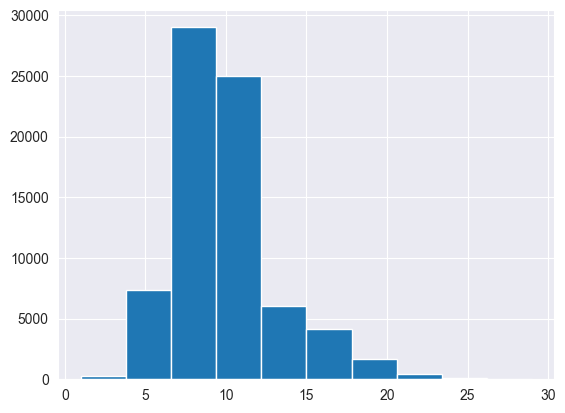

In [35]:
# посмотрим распределение целевого признака
X['Age'].hist()

In [36]:
X.shape

(74051, 12)

In [27]:
# посмотрим на графике отношение каждого признака к таргету Age
X.columns

Index(['id', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

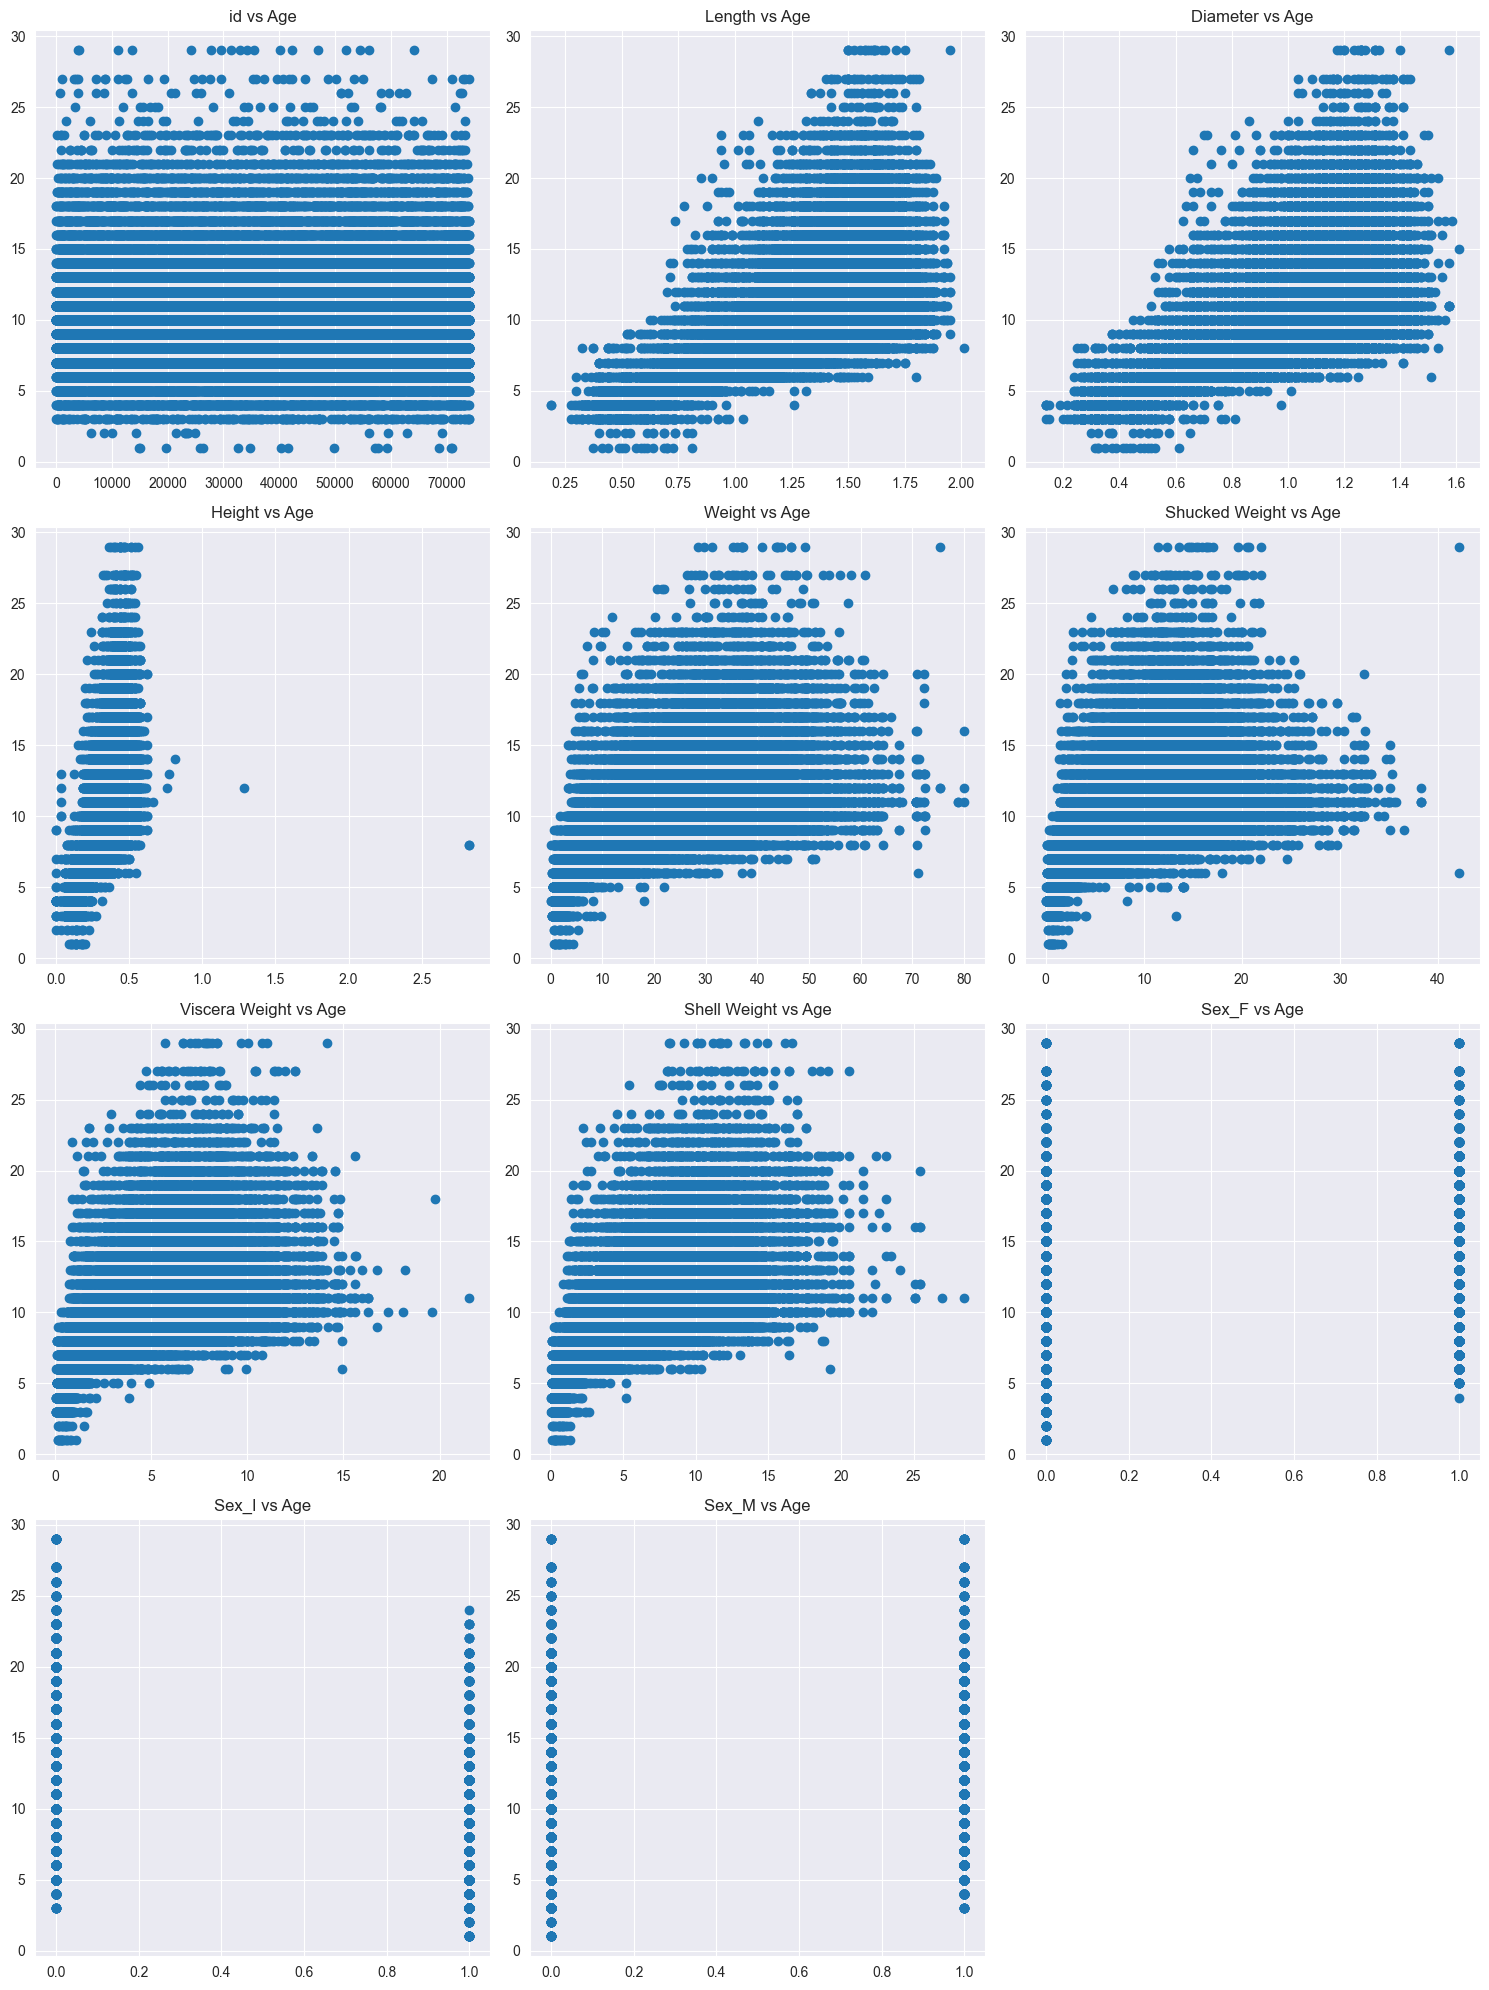

In [28]:
# Список столбцов для сравнения с 'Age'
columns = X.columns.drop('Age')

# Количество графиков
n_plots = len(columns)

# Количество графиков в одной строке
n_cols = 3

# Количество строк графиков
n_rows = (n_plots + n_cols - 1) // n_cols

# Создаем фигуру с подходящим размером
plt.figure(figsize=(5 * n_cols, 5 * n_rows))

# Цикл по всем столбцам
for i, column in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(X[column], X['Age'])
    plt.title(f'{column} vs Age')

# Отображаем графики
plt.tight_layout()
plt.show()

# Предобработка данных

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
 9   Sex_F           74051 non-null  int32  
 10  Sex_I           74051 non-null  int32  
 11  Sex_M           74051 non-null  int32  
dtypes: float64(7), int32(3), int64(2)
memory usage: 5.9 MB


In [41]:
# Этот код проверит наличие дубликатов во всем датафрейме
X.duplicated().sum()

0

In [42]:
# проверка на пустые значения
X.isna().sum()

id                0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64

## Разделим X и y

In [44]:
y = X['Age']
X = X.drop('Age', axis=1)

In [62]:
from sklearn.preprocessing import StandardScaler

# масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Преобразование обратно в датафрейм с сохранением имен столбцов
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [63]:
X_scaled

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,0.721238,0.633982,0.292400,0.441804,0.467188,0.569186,0.453376,-0.671427,1.446028,-0.759381
1,-0.755712,-0.840356,-0.794163,-1.025198,-0.993688,-0.978880,-0.926788,-0.671427,1.446028,-0.759381
2,0.243401,0.370707,0.292400,0.110076,0.219924,0.178363,-0.017224,-0.671427,-0.691550,1.316861
3,1.329394,1.634426,1.650603,2.156483,1.824616,2.124622,2.308095,1.489365,-0.691550,-0.759381
4,-0.234435,-0.050532,-0.115061,-0.007598,0.333464,-0.197233,-0.214955,-0.671427,1.446028,-0.759381
...,...,...,...,...,...,...,...,...,...,...
74046,1.199075,1.002567,0.971501,2.156483,1.882648,1.899000,1.564626,1.489365,-0.691550,-0.759381
74047,-0.842591,-0.682391,-0.794163,-1.022957,-1.029011,-0.989031,-0.887242,-0.671427,1.446028,-0.759381
74048,0.590919,0.739292,0.699861,0.482150,0.391495,0.888951,0.378238,1.489365,-0.691550,-0.759381
74049,-0.364754,-0.261152,-0.386702,-0.523122,-0.201434,-0.765703,-0.681601,-0.671427,1.446028,-0.759381


## Предобработка тестового датасета

In [70]:
# загрузим тестовый датасет

DATA_URL = "https://raw.githubusercontent.com/enpure/kaggle---Regression-with-a-Crab-Age-Dataset/main/"
test = pd.read_csv(DATA_URL + "test.csv", index_col='id')
test.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [76]:
# предобработаем тестовый датасет, также, как и тренировочный
print(test.duplicated().sum())
print(test.isna().sum())

# Преобразуем категориальный признак через get_dummy
test = pd.get_dummies(test, columns=['Sex'])      

# преобразуем из булевого в числовой формат, хотя это не обязательно, можно обучать и с булевыми признаками
test['Sex_F'] = test['Sex_F'].astype(int)
test['Sex_I'] = test['Sex_I'].astype(int)
test['Sex_M'] = test['Sex_M'].astype(int)

0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64


In [78]:
# масштабирование
#При масштабировании тестовых данных необходимо использовать тот же объект scaler, который был обучен на тренировочных данных. Не нужно создавать новый экземпляр StandardScaler или вызывать метод fit на тестовых данных. Вместо этого следует использовать метод transform для применения тех же параметров масштабирования, что и для тренировочных данных. Вот как это должно выглядеть:

test_scaled = scaler.transform(test)

# Преобразование обратно в датафрейм с сохранением имен столбцов
test_scaled = pd.DataFrame(test_scaled, columns=test.columns)

# Подбор и обучение модели

## Линейная регрессия

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_scaled, y)

# Предсказание на тестовой выборке
y_pred = model.predict(test_scaled)

In [87]:
# Создание DataFrame с результатами
submission = pd.DataFrame({'id': test.index, 'Age': y_pred})

# Сохранение в файл
submission.to_csv('submission.csv', index=False)

## Регуляризация

In [88]:
# Ridge L2 регуляризация
from sklearn.linear_model import Ridge

# Обучение модели гребневой регрессии
model_L2 = Ridge(alpha=1.0)
model_L2.fit(X_scaled, y)

# Предсказание на тестовой выборке
y_pred_L2 = model.predict(test_scaled)

# Создание DataFrame с результатами
submission_L2 = pd.DataFrame({'id': test.index, 'Age': y_pred_L2})

# Сохранение в файл
submission_L2.to_csv('submission_L2.csv', index=False)

## Деревья решений и случайный лес

In [89]:
from sklearn.ensemble import RandomForestRegressor

# Обучение модели случайного леса
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_scaled, y)

# Предсказание на тестовой выборке
y_pred_rf = model_rf.predict(test_scaled)

# Сохранение результатов
submission_rf = pd.DataFrame({'id': test.index, 'Age': y_pred_rf})
submission_rf.to_csv('submission_rf.csv', index=False)

## Градиентный бустинг

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

# Обучение модели градиентного бустинга
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb.fit(X_scaled, y)

# Предсказание на тестовой выборке
y_pred_gb = model_gb.predict(test_scaled)

# Сохранение результатов
submission_gb = pd.DataFrame({'id': test.index, 'Age': y_pred_gb})
submission_gb.to_csv('submission_gb.csv', index=False)

## Метод опорных векторов для регрессии (SVR)

In [ ]:
from sklearn.svm import SVR

# Обучение модели SVR
model_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model_svr.fit(X_scaled, y)

# Предсказание на тестовой выборке
y_pred_svr = model_svr.predict(test_scaled)

# Сохранение результатов
submission_svr = pd.DataFrame({'id': test.index, 'Age': y_pred_svr})
submission_svr.to_csv('submission_svr.csv', index=False)

## Нейронные сети

In [ ]:
from sklearn.neural_network import MLPRegressor

# Обучение модели нейронной сети
model_nn = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
model_nn.fit(X_scaled, y)

# Предсказание на тестовой выборке
y_pred_nn = model_nn.predict(test_scaled)

# Сохранение результатов
submission_nn = pd.DataFrame({'id': test.index, 'Age': y_pred_nn})
submission_nn.to_csv('submission_nn.csv', index=False)